In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_elec=pd.read_csv(r"C:\Users\jhgel\OneDrive\Escritorio\jupyter notebook\electricity.csv", sep=",")

In [3]:
data_elec.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,b'2',0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,b'UP'
1,0.0,b'2',0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,b'UP'
2,0.0,b'2',0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,b'UP'
3,0.0,b'2',0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,b'UP'
4,0.0,b'2',0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,b'DOWN'


In [4]:
data_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  object 
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), object(2)
memory usage: 3.1+ MB


In [5]:
data_elec.shape

(45312, 9)

In [6]:
data_elec.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

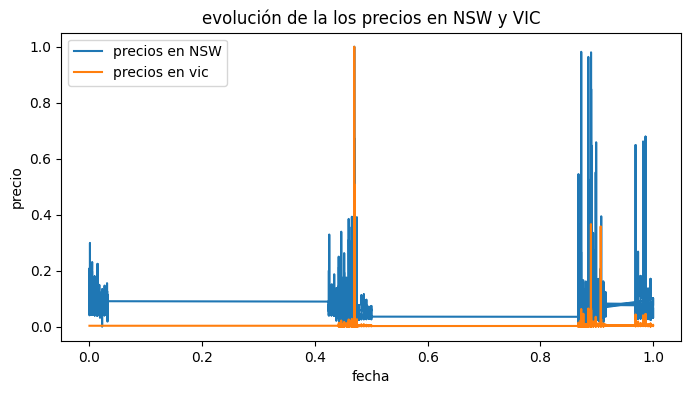

In [7]:
plt.figure(figsize=(8,4))
plt.plot(data_elec['date'], data_elec['nswprice'], label="precios en NSW")
plt.plot(data_elec['date'], data_elec['vicprice'], label="precios en vic")
plt.xlabel('fecha')
plt.ylabel('precio')
plt.title('evolución de la los precios en NSW y VIC')
plt.legend()
plt.show()

          

           

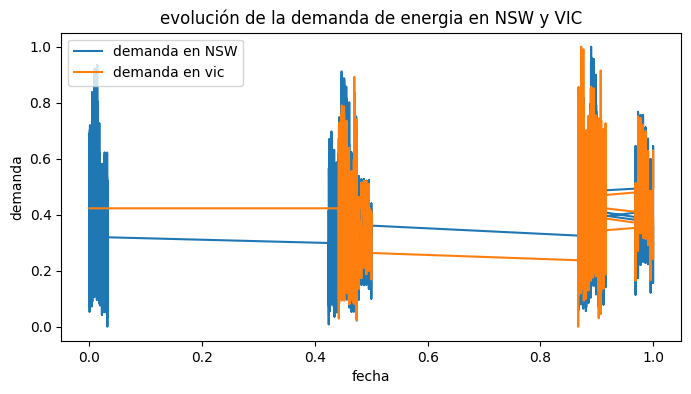

In [8]:
plt.figure(figsize=(8,4))
plt.plot(data_elec['date'], data_elec['nswdemand'], label="demanda en NSW")
plt.plot(data_elec['date'], data_elec['vicdemand'], label="demanda en vic")
plt.xlabel('fecha')
plt.ylabel('demanda')
plt.title('evolución de la demanda de energia en NSW y VIC')
plt.legend()
plt.show()


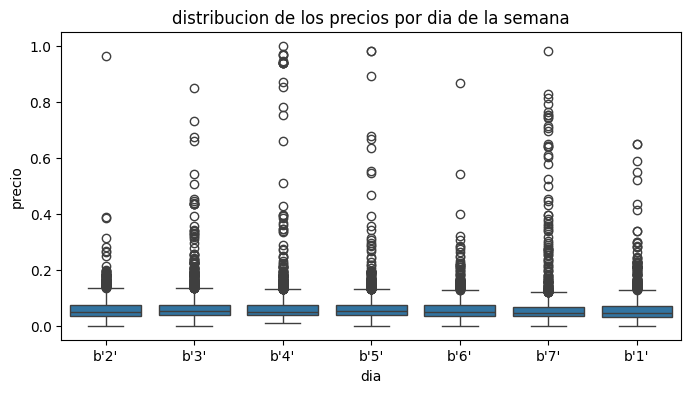

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x='day', y='nswprice', data=data_elec)
plt.xlabel('dia')
plt.ylabel('precio')
plt.title('distribucion de los precios por dia de la semana')
plt.show()
           

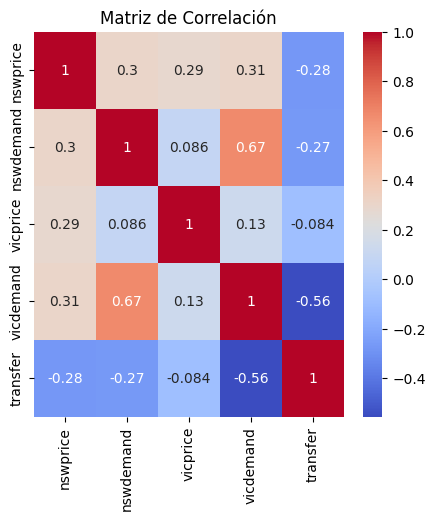

In [10]:
plt.figure(figsize=(5, 5))
sns.heatmap(data_elec[['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


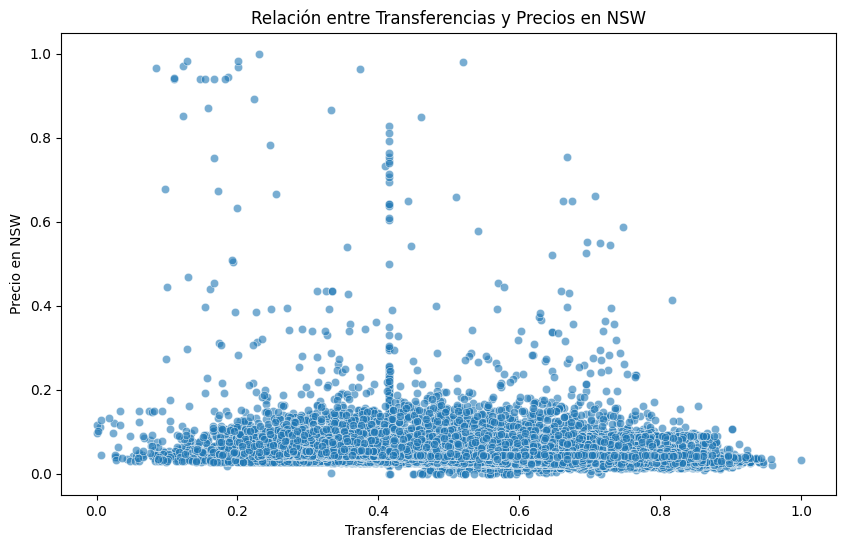

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transfer', y='nswprice', data=data_elec, alpha=0.6)
plt.xlabel('Transferencias de Electricidad')
plt.ylabel('Precio en NSW')
plt.title('Relación entre Transferencias y Precios en NSW')
plt.show()

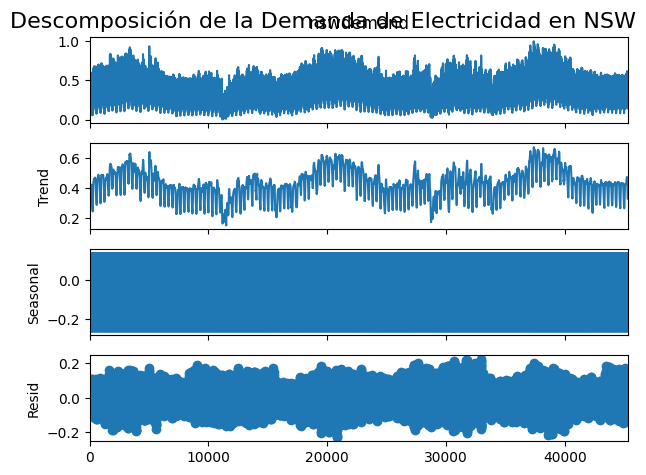

In [13]:
 from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
result = seasonal_decompose(data_elec['nswdemand'], model='additive', period=48)  # 48 períodos diarios

# Graficar la descomposición
result.plot()
plt.suptitle('Descomposición de la Demanda de Electricidad en NSW', fontsize=16)
plt.show()



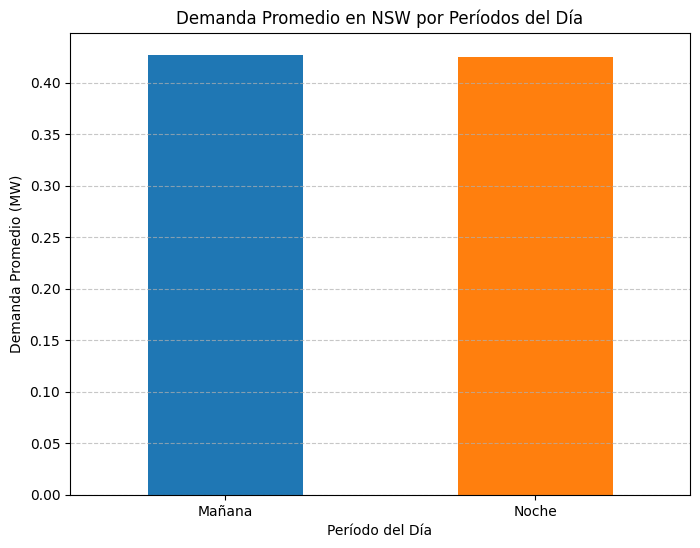

In [15]:
# Crear una nueva columna para clasificar los períodos del día
def categorize_period(row):
    if 1 <= row['period'] <= 16:
        return 'Mañana'
    elif 17 <= row['period'] <= 32:
        return 'Tarde'
    else:
        return 'Noche'

data_elec['time_of_day'] = data_elec.apply(categorize_period, axis=1)

# Calcular la demanda promedio por período del día
avg_demand = data_elec.groupby('time_of_day')['nswdemand'].mean()

# Graficar la comparación de demanda
plt.figure(figsize=(8, 6))
avg_demand.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Período del Día')
plt.ylabel('Demanda Promedio (MW)')
plt.title('Demanda Promedio en NSW por Períodos del Día')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


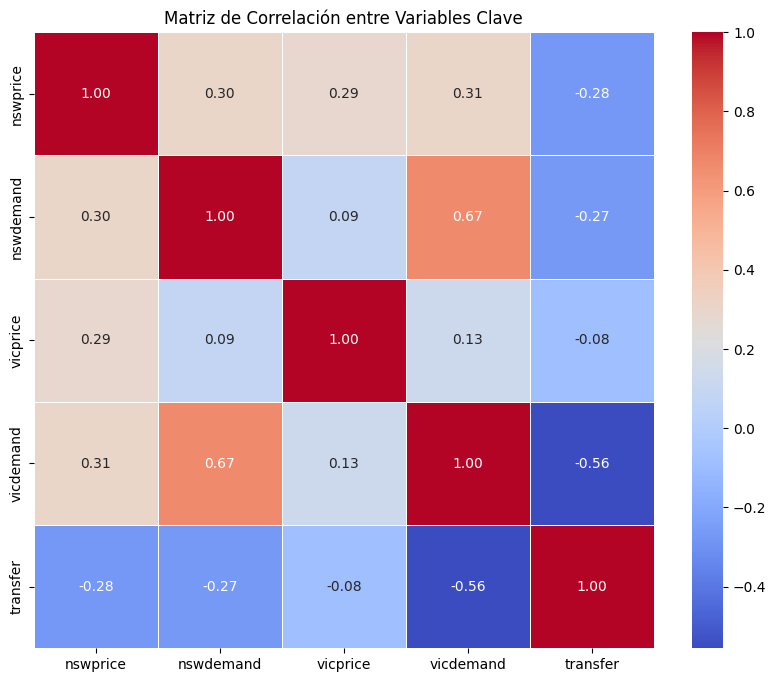

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables clave para la matriz de correlación
correlation_data = data_elec[['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Clave')
plt.show()


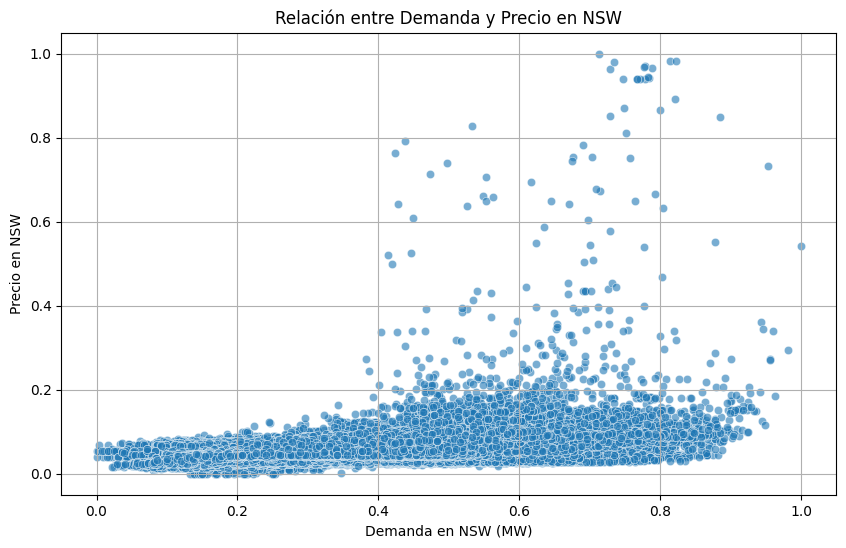

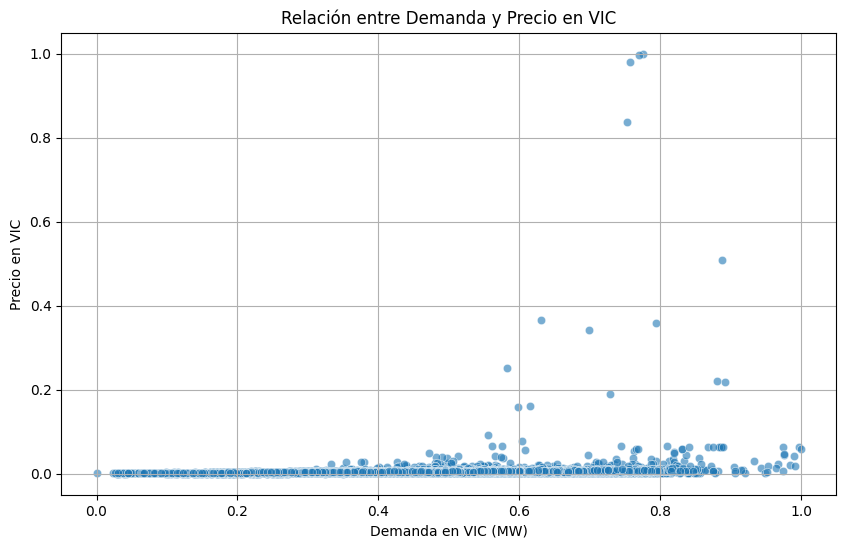

In [19]:
# Relación entre demanda y precio en NSW
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nswdemand', y='nswprice', alpha=0.6,data=data_elec)
plt.xlabel('Demanda en NSW (MW)')
plt.ylabel('Precio en NSW')
plt.title('Relación entre Demanda y Precio en NSW')
plt.grid(True)
plt.show()

# Relación entre demanda y precio en VIC
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vicdemand', y='vicprice', alpha=0.6,data=data_elec)
plt.xlabel('Demanda en VIC (MW)')
plt.ylabel('Precio en VIC')
plt.title('Relación entre Demanda y Precio en VIC')
plt.grid(True)
plt.show()


In [23]:
from statsmodels.tsa.stattools import adfuller


# Asegurar que 'date' sea de tipo datetime
data_elec['date'] = pd.to_datetime(data_elec['date'])

# Ordenar por fecha
data_elec.sort_values(by='date', inplace=True)

# Verificar estacionariedad con la prueba ADF
adf_result = adfuller(data_elec['nswprice'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Si no es estacionaria, aplicar diferenciación
if adf_result[1] > 0.05:
    data_elec['nswprice_diff'] = data_elec['nswprice'].diff().dropna()


ADF Statistic: -15.399187934584285
p-value: 3.232258013180929e-28


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Configurar y entrenar el modelo ARIMA
model_arima = ARIMA(data_elec['nswprice'], order=(5, 1, 0))  # Cambiar los parámetros (p, d, q) según sea necesario
arima_result = model_arima.fit()

# Resumen del modelo
print(arima_result.summary())

# Predicción a corto plazo
forecast_arima = arima_result.forecast(steps=48)  # Predecir las próximas 48 medias horas (un día)
print(forecast_arima)


C:\Users\jhgel\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\jhgel\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\jhgel\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               nswprice   No. Observations:                45312
Model:                 ARIMA(5, 1, 0)   Log Likelihood               97618.369
Date:                Fri, 03 Jan 2025   AIC                        -195224.738
Time:                        19:54:07   BIC                        -195172.410
Sample:                             0   HQIC                       -195208.271
                              - 45312                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3628      0.001   -649.914      0.000      -0.364      -0.362
ar.L2         -0.2551      0.001   -350.846      0.000      -0.257      -0.254
ar.L3         -0.1898      0.001   -181.478      0.0

C:\Users\jhgel\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jhgel\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\jhgel\AppData\Local\Temp\ipykernel_11916\2235378116.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.plot(pd.date_range(data_elec['date'].iloc[-1], periods=48, freq='30T'), forecast_arima, label='Predicción ARIMA', color='orange')


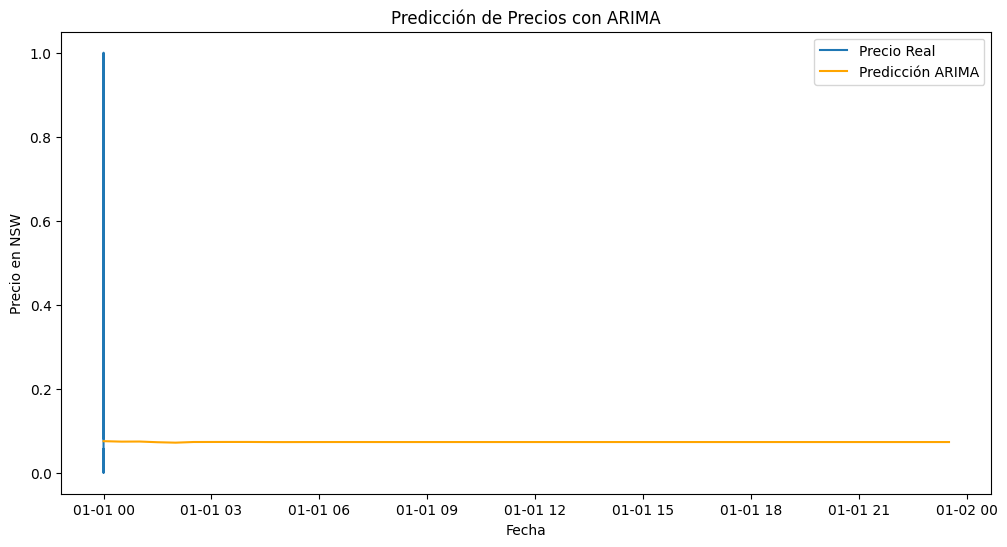

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_elec['date'], data_elec['nswprice'], label='Precio Real')
plt.plot(pd.date_range(data_elec['date'].iloc[-1], periods=48, freq='30T'), forecast_arima, label='Predicción ARIMA', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Precio en NSW')
plt.title('Predicción de Precios con ARIMA')
plt.legend()
plt.show()


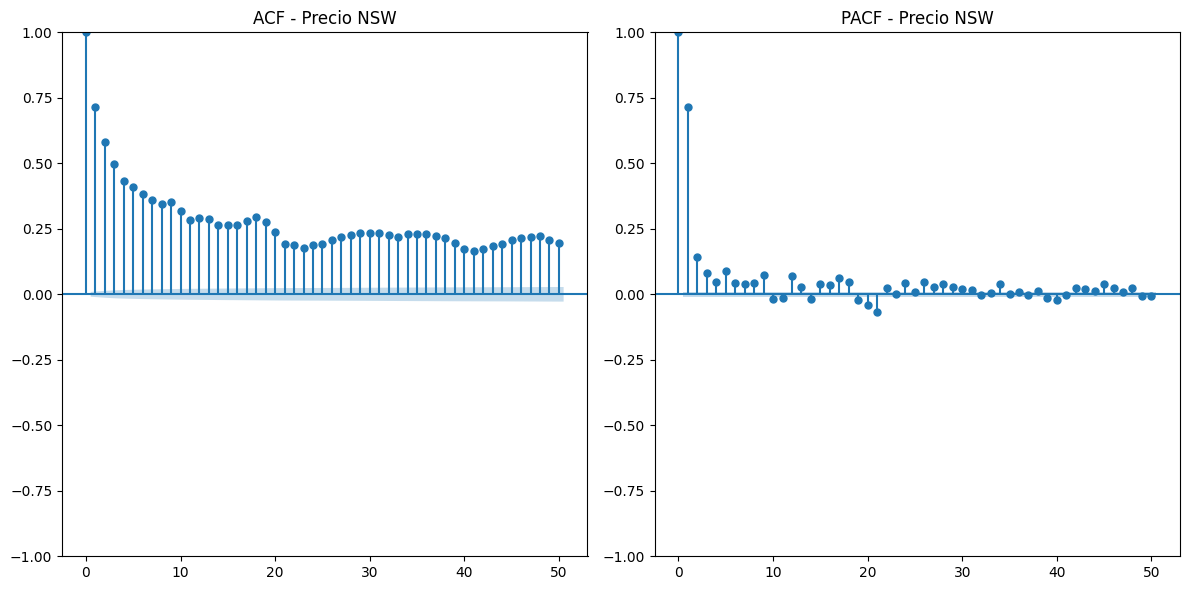

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_elec['nswprice'].dropna(), lags=50, ax=plt.gca())
plt.title('ACF - Precio NSW')

plt.subplot(122)
plot_pacf(data_elec['nswprice'].dropna(), lags=50, ax=plt.gca())
plt.title('PACF - Precio NSW')

plt.tight_layout()
plt.show()
